In [1]:
import csv
import pandas as pd


In [2]:
gg_df = pd.read_csv('gg_final_dataframe.csv')
gg_df

,artist_id,artist_x,song_id,song_name,album_id,album,Like_Count,Lyric,date,year
0,80015705,SG워너비,80279378,Must Have Love (우리들의 겨울),20006374,SG워너비 & 브라운 아이드 걸스,"[40,450]",[함께 있단 이유로 행복했었던 \n우리들의 겨울날의 소중한 기억들\n좋은 날엔 언제...,2006-11-16,2006
1,80015705,브라운 아이드 걸스,1598921,어쩌다,20298156,My Style,"[45,790]",[* 어쩌다 어쩌다 어쩌다 \n널 사랑하게 됐는지 \n내가 왜 이꼴이 됐는지\n...,2008-09-16,2008
2,80015705,브라운 아이드 걸스,1597926,You,20298156,My Style,"[21,679]",[Yeah Yeah Yeah Yeah\n그대는 내게 바람과 같네 돌아와 Baby\n...,2008-09-16,2008
3,80015705,브라운 아이드 걸스,1775962,Abracadabra,444618,Sound G.,"[230,108]",[이러다 미쳐 내가 여리 여리 착하던 그런 내가\n너 때문에 돌아 내가 독한 나로 ...,2009-07-21,2009
4,80015705,브라운 아이드 걸스,1770201,Candy Man,444618,Sound G.,"[128,685]",[캔디처럼 달콤한 숨이 멈출듯한 미소\n몇번씩 몇번씩 무너지는거야 대체\nfanta...,2009-07-21,2009
...,...,...,...,...,...,...,...,...,...,...
1963,20164333,NewJeans,6170060,Attention,4082425,NewJeans 1st EP 'New Jeans',"[6,365]",[You and me\n내 맘이 보이지\n한참을 쳐다봐\n가까이 다가가\nYou s...,2022-08-01,2022
1964,20164333,NewJeans,6171084,Cookie,4082425,NewJeans 1st EP 'New Jeans',"[3,368]",[내가 만든 쿠키\n너를 위해 구웠지\nBut you know that it ain...,2022-08-01,2022
1965,20164333,NewJeans,6170218,Hurt,4082425,NewJeans 1st EP 'New Jeans',"[2,075]",[보고 싶은 생각에\n들어간 우리 창에\n나는 말을 거는데\n보내지는 않을래\n느린...,2022-08-01,2022
1966,20164333,NewJeans,6184997,Ditto,4078016,NewJeans 'OMG',"[4,218]",[Woo woo woo woo ooh\nWoo woo woo woo\nStay in...,2023-01-02,2023


In [ ]:
# for cancelled_csv in list_csvs:
#     print(cancelled_csv)
#     specific_path = os.path.join(path_cancelled, cancelled_csv)
#     artist_dataframe = pd.read_csv(specific_path)
    
#     artist_dataframe.drop(columns = ['Unnamed: 0'], inplace = True)
#     artist_dataframe.set_index('Datetime', inplace = True)
    
#     artist_dataframe.drop(columns = ['Text', 'Username', 'cleaned_text'], inplace = True)
    
#     artist_dataframe['weighting'] = 0.1 * artist_dataframe['likes'] + artist_dataframe['retweet'] 
    
#     artist_dataframe.reset_index(inplace = True)
#     artist_dataframe['Datetime'] = pd.to_datetime(artist_dataframe['Datetime'], yearfirst = True)
#     artist_dataframe.set_index('Datetime', inplace = True)
    
#     artist_positives = artist_dataframe[(artist_dataframe['classified_sentiment'] == 'Positive') | (artist_dataframe['classified_sentiment'] == 'Extremely Positive')]
#     artist_positives.rename(columns = {'weighting':'positive_weights'}, inplace = True)
    
#     artist_positive = artist_positives.groupby('Datetime').sum()
#     artist_positive_df = pd.DataFrame(artist_positive.iloc[:,-1])
    
#     artist_negatives = artist_dataframe[(artist_dataframe['classified_sentiment'] == 'Negative') | (artist_dataframe['classified_sentiment'] == 'Extremely Negative')]
#     artist_negatives.rename(columns = {'weighting':'negative_weights'}, inplace = True)
    
#     artist_negative = artist_negatives.groupby('Datetime').sum()
#     artist_negative_df = pd.DataFrame(artist_negative.iloc[:,-1])
    
#     artist_weighted_sentiment = pd.merge(artist_positive_df, artist_negative_df, how = 'outer', left_index= True, right_index= True)
#     print(artist_weighted_sentiment)

# NLP

In [5]:
import re
import string
import nltk
# nltk.download('wordnet')
# nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import emoji
from cleantext import clean
import string
import re
from emot.emo_unicode import UNICODE_EMOJI

def clean_text(text):
    #changing to lowercase
    text = text.lower()
    
    # removing #´s 
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    
    #remove RT
    text = re.sub(r'RT[\s]+', '', text)
    
    #remove links
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r"www.\S+", "", text)
    
    #remove indentation
    text = re.sub(r'\n', '', text)
    
    #tokenizing words
    tokens = word_tokenize(text)
    
    filtered_words = [w for w in tokens if w not in list(UNICODE_EMOJI.keys())]
    
    return text

In [6]:
gg_df['cleaned_lyrics'] = gg_df.Lyric.apply(clean_text)

In [7]:
gg_df_2 = gg_df[['artist_x', 'song_name', 'year', 'cleaned_lyrics']]
gg_df_2

,artist_x,song_name,year,cleaned_lyrics
0,SG워너비,Must Have Love (우리들의 겨울),2006,[함께 있단 이유로 행복했었던 우리들의 겨울날의 소중한 기억들좋은 날엔 언제나 네가...
1,브라운 아이드 걸스,어쩌다,2008,[* 어쩌다 어쩌다 어쩌다 널 사랑하게 됐는지 내가 왜 이꼴이 됐는지어쩌다 어쩌...
2,브라운 아이드 걸스,You,2008,[yeah yeah yeah yeah그대는 내게 바람과 같네 돌아와 babyfeel...
3,브라운 아이드 걸스,Abracadabra,2009,[이러다 미쳐 내가 여리 여리 착하던 그런 내가너 때문에 돌아 내가 독한 나로 변해...
4,브라운 아이드 걸스,Candy Man,2009,[캔디처럼 달콤한 숨이 멈출듯한 미소몇번씩 몇번씩 무너지는거야 대체fantastic...
...,...,...,...,...
1963,NewJeans,Attention,2022,[you and me내 맘이 보이지한참을 쳐다봐가까이 다가가you seeyou se...
1964,NewJeans,Cookie,2022,[내가 만든 쿠키너를 위해 구웠지but you know that it ain’t f...
1965,NewJeans,Hurt,2022,[보고 싶은 생각에들어간 우리 창에나는 말을 거는데보내지는 않을래느린 한마디보다조용...
1966,NewJeans,Ditto,2023,[woo woo woo woo oohwoo woo woo woostay in the...


In [8]:
by_year = gg_df_2.groupby(['year']).sum()[['cleaned_lyrics']]
by_year

,cleaned_lyrics
year,
2006,[함께 있단 이유로 행복했었던 우리들의 겨울날의 소중한 기억들좋은 날엔 언제나 네가...
2007,[와아 여름이다 막 이래here we go now&lt;이재훈&gt;어떡해 올 여름...
2008,[* 어쩌다 어쩌다 어쩌다 널 사랑하게 됐는지 내가 왜 이꼴이 됐는지어쩌다 어쩌...
2009,[이러다 미쳐 내가 여리 여리 착하던 그런 내가너 때문에 돌아 내가 독한 나로 변해...
2010,[전에 알던 내가 아냐 brand new sound새로워진 나와 함께 one mor...
2011,[feel watch plus sixth sense길들여질 수가 없어 나는 절대do...
2012,[너의 숨소리가 귓가에 불어오는 밤식지 않은 이 여름 밤을 난 너와 함께도시 불빛이...
2013,[나쁜 짓을 저질렀어요 그렇게 놀란 눈으로 날 보지 마요여기서 다 털어놓을까요어젯밤...
2014,[온도가 so hot 뜨거 like a roof on fire on the rock...


In [60]:
def kor_to_eng(text):
    #stage_1: man, boy, girl, oppa, love, like, want
    text = text.replace("사랑", "love")
    text = text.replace("좋아", "like") # like has multiple meanings, so needs to n-gram as well
    text = text.replace("키스", "kiss")
    text = text.replace("뽀뽀", "kiss")
    text = text.replace("터치", 'touch')
    text = text.replace("안아", 'hug')
#     text = text.replace("원해", "want")
#     text = text.replace("원하", "want")
# want & girl should be dealt with n-grams because the meaning is completely different 
#between English and Korean
    
    #gender-specific
    
    text = text.replace("소녀", "so-nyeo") #young girl
    text = text.replace("여자", "woman")
    text = text.replace("소년", 'boy')
    text = text.replace("오빠", "oppa")
    text = text.replace("그의", 'he')
    text = text.replace("그와", 'he')
    text = text.replace("그를", 'he')
    text = text.replace("그가", 'he')
    text = text.replace("그는", 'he')
    text = text.replace("놈", 'guy')
    
    #돈 (money)
      
    return text

In [61]:
by_year['trans_lyrics'] = by_year.cleaned_lyrics.apply(kor_to_eng)

In [62]:
by_year

,cleaned_lyrics,trans_lyrics
year,,
2006,[함께 있단 이유로 행복했었던 우리들의 겨울날의 소중한 기억들좋은 날엔 언제나 네가...,[함께 있단 이유로 행복했었던 우리들의 겨울날의 소중한 기억들좋은 날엔 언제나 네가...
2007,[와아 여름이다 막 이래here we go now&lt;이재훈&gt;어떡해 올 여름...,[와아 여름이다 막 이래here we go now&lt;이재훈&gt;어떡해 올 여름...
2008,[* 어쩌다 어쩌다 어쩌다 널 사랑하게 됐는지 내가 왜 이꼴이 됐는지어쩌다 어쩌...,[* 어쩌다 어쩌다 어쩌다 널 love하게 됐는지 내가 왜 이꼴이 됐는지어쩌다 ...
2009,[이러다 미쳐 내가 여리 여리 착하던 그런 내가너 때문에 돌아 내가 독한 나로 변해...,[이러다 미쳐 내가 여리 여리 착하던 그런 내가너 때문에 돌아 내가 독한 나로 변해...
2010,[전에 알던 내가 아냐 brand new sound새로워진 나와 함께 one mor...,[전에 알던 내가 아냐 brand new sound새로워진 나와 함께 one mor...
2011,[feel watch plus sixth sense길들여질 수가 없어 나는 절대do...,[feel watch plus sixth sense길들여질 수가 없어 나는 절대do...
2012,[너의 숨소리가 귓가에 불어오는 밤식지 않은 이 여름 밤을 난 너와 함께도시 불빛이...,[너의 숨소리가 귓가에 불어오는 밤식지 않은 이 여름 밤을 난 너와 함께도시 불빛이...
2013,[나쁜 짓을 저질렀어요 그렇게 놀란 눈으로 날 보지 마요여기서 다 털어놓을까요어젯밤...,[나쁜 짓을 저질렀어요 그렇게 놀란 눈으로 날 보지 마요여기서 다 털어놓을까요어젯밤...
2014,[온도가 so hot 뜨거 like a roof on fire on the rock...,[온도가 so hot 뜨거 like a roof on fire on the rock...


In [63]:
# npnpn = by_year.iloc[2, :]
#len(npnpn[0])

In [64]:
stop_words = list(stopwords.words('english'))

manual_sw = ["n't", '내', '너의', '난', '날', '내가', '너','나', '그', '니', '걸', '거야'
             '널', '네', '니가', '네가', '널', '너를', '넌', '내게', '이', 'l', 'u', '-',
            'na', 'ah', 'e','m', 'uh', 'eh', 's', 'la', 'a', 'o', 'ta', 't', 'oh', 'du', 'yeah', '’']
#넌 난 어쩌구저쩌구 하는 것 부터가 사랑 노래라는 것을 시사하지 않나..

stop_words.extend(manual_sw)

by_year['trans_lyrics'] = by_year['trans_lyrics'].apply(lambda x: ' '.join([word for word in x.split() if word not in manual_sw]))
by_year

,cleaned_lyrics,trans_lyrics
year,,
2006,[함께 있단 이유로 행복했었던 우리들의 겨울날의 소중한 기억들좋은 날엔 언제나 네가...,[함께 있단 이유로 행복했었던 우리들의 겨울날의 소중한 기억들좋은 날엔 언제나 있기...
2007,[와아 여름이다 막 이래here we go now&lt;이재훈&gt;어떡해 올 여름...,[와아 여름이다 막 이래here we go now&lt;이재훈&gt;어떡해 올 여름...
2008,[* 어쩌다 어쩌다 어쩌다 널 사랑하게 됐는지 내가 왜 이꼴이 됐는지어쩌다 어쩌...,[* 어쩌다 어쩌다 어쩌다 love하게 됐는지 왜 이꼴이 됐는지어쩌다 어쩌다 어쩌다...
2009,[이러다 미쳐 내가 여리 여리 착하던 그런 내가너 때문에 돌아 내가 독한 나로 변해...,[이러다 미쳐 여리 여리 착하던 그런 내가너 때문에 돌아 독한 나로 변해 내가너를 ...
2010,[전에 알던 내가 아냐 brand new sound새로워진 나와 함께 one mor...,[전에 알던 아냐 brand new sound새로워진 나와 함께 one more r...
2011,[feel watch plus sixth sense길들여질 수가 없어 나는 절대do...,[feel watch plus sixth sense길들여질 수가 없어 나는 절대do...
2012,[너의 숨소리가 귓가에 불어오는 밤식지 않은 이 여름 밤을 난 너와 함께도시 불빛이...,[너의 숨소리가 귓가에 불어오는 밤식지 않은 여름 밤을 너와 함께도시 불빛이면 나는...
2013,[나쁜 짓을 저질렀어요 그렇게 놀란 눈으로 날 보지 마요여기서 다 털어놓을까요어젯밤...,[나쁜 짓을 저질렀어요 그렇게 놀란 눈으로 보지 마요여기서 다 털어놓을까요어젯밤 그...
2014,[온도가 so hot 뜨거 like a roof on fire on the rock...,[온도가 so hot 뜨거 like roof on fire on the rocks ...


In [65]:
def words_by_year(year):
    df_by_year = by_year.loc[year, :]
    df_2 = " ".join(cat for cat in df_by_year)
    return df_2

In [66]:
df_2006 = words_by_year(2006)
df_2007 = words_by_year(2007)
df_2008 = words_by_year(2008)
df_2009 = words_by_year(2009)
df_2010 = words_by_year(2010)
df_2011 = words_by_year(2011)
df_2012 = words_by_year(2012)
df_2013 = words_by_year(2013)
df_2014 = words_by_year(2014)
df_2015 = words_by_year(2015)
df_2016 = words_by_year(2016)
df_2017 = words_by_year(2017)
df_2018 = words_by_year(2018)
df_2019 = words_by_year(2019)
df_2020 = words_by_year(2020)
df_2021 = words_by_year(2021)
df_2022 = words_by_year(2022)
# df_2023 = words_by_year(2023)

## wordcloud


In [67]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

In [68]:
def word_cloud_year(df):
    word_cloud = WordCloud(font_path='Binggrae', width = 1000, height = 300, 
    colormap='BuPu', max_words=100, collocations = False).generate(df)


    plt.figure(figsize = (10,8))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

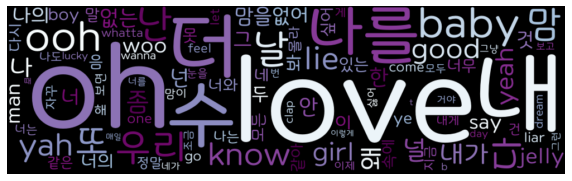

In [69]:
word_cloud_year(df_2016)

# frquency of a specific word (ratio)

In [70]:
# Why boy is still so frequent?

In [71]:
def word_by_years(text, word):
#     df_by_year = by_year.loc[year, :]
#     text = " ".join(cat for cat in text)
    num_of_word = text.count(word)
    len_of_df = len(text)
    ratio = num_of_word / len_of_df *100
    return round(ratio, 3)

In [74]:
# love like kiss touch hug 
# nyeo woman boy oppa he guy

In [115]:
by_year['love'] = by_year.trans_lyrics.apply(lambda x: word_by_years(x, "love"))
by_year['kiss'] = by_year.trans_lyrics.apply(lambda x: word_by_years(x, "kiss"))
by_year['touch'] = by_year.trans_lyrics.apply(lambda x: word_by_years(x, "touch"))
by_year['like'] = by_year.trans_lyrics.apply(lambda x: word_by_years(x, "like"))

by_year['so-nyo'] = by_year.trans_lyrics.apply(lambda x: word_by_years(x, "nyeo"))
by_year['woman'] = by_year.trans_lyrics.apply(lambda x: word_by_years(x, "woman"))
by_year['he/him/his'] = by_year.trans_lyrics.apply(lambda x: word_by_years(x, "he"))
by_year['guy'] = by_year.trans_lyrics.apply(lambda x: word_by_years(x, "guy"))

by_year['boy'] = by_year.trans_lyrics.apply(lambda x: word_by_years(x, "boy"))
by_year['man'] = by_year.trans_lyrics.apply(lambda x: word_by_years(x, "man"))
by_year['oppa'] = by_year.trans_lyrics.apply(lambda x: word_by_years(x, "oppa"))
by_year['want'] = by_year.trans_lyrics.apply(lambda x: word_by_years(x, "wan"))

by_year['girl'] = by_year.trans_lyrics.apply(lambda x: word_by_years(x, "girl"))
by_year['girls'] = by_year.trans_lyrics.apply(lambda x: word_by_years(x, "girls"))

## plot

In [116]:
import seaborn as sns

In [117]:
keywords_df = by_year.drop(columns=['cleaned_lyrics', 'trans_lyrics']).iloc[:-1,:]
keywords_df

,love,kiss,touch,like,so-nyo,woman,he/him/his,guy,boy,man,oppa,want,girl,girls
year,,,,,,,,,,,,,,
2006,0.808,0.000,0.000,0.110,0.000,0.122,0.441,0.000,0.000,0.147,0.000,0.135,0.037,0.000
2007,0.555,0.054,0.000,0.149,0.000,0.018,0.239,0.006,0.048,0.024,0.000,0.143,0.000,0.000
2008,0.565,0.017,0.000,0.146,0.000,0.022,0.101,0.011,0.034,0.022,0.000,0.302,0.179,0.011
2009,0.546,0.010,0.003,0.104,0.003,0.036,0.328,0.022,0.142,0.043,0.000,0.266,0.230,0.043
2010,0.362,0.022,0.013,0.141,0.000,0.032,0.314,0.000,0.108,0.043,0.017,0.147,0.039,0.027
2011,0.467,0.012,0.004,0.125,0.000,0.036,0.441,0.001,0.142,0.049,0.003,0.172,0.108,0.052
2012,0.580,0.090,0.088,0.312,0.000,0.055,0.350,0.000,0.079,0.092,0.004,0.060,0.083,0.012
2013,0.579,0.048,0.089,0.126,0.000,0.049,0.308,0.006,0.184,0.060,0.005,0.094,0.103,0.010
2014,0.529,0.089,0.019,0.136,0.001,0.044,0.288,0.003,0.044,0.052,0.007,0.045,0.029,0.004


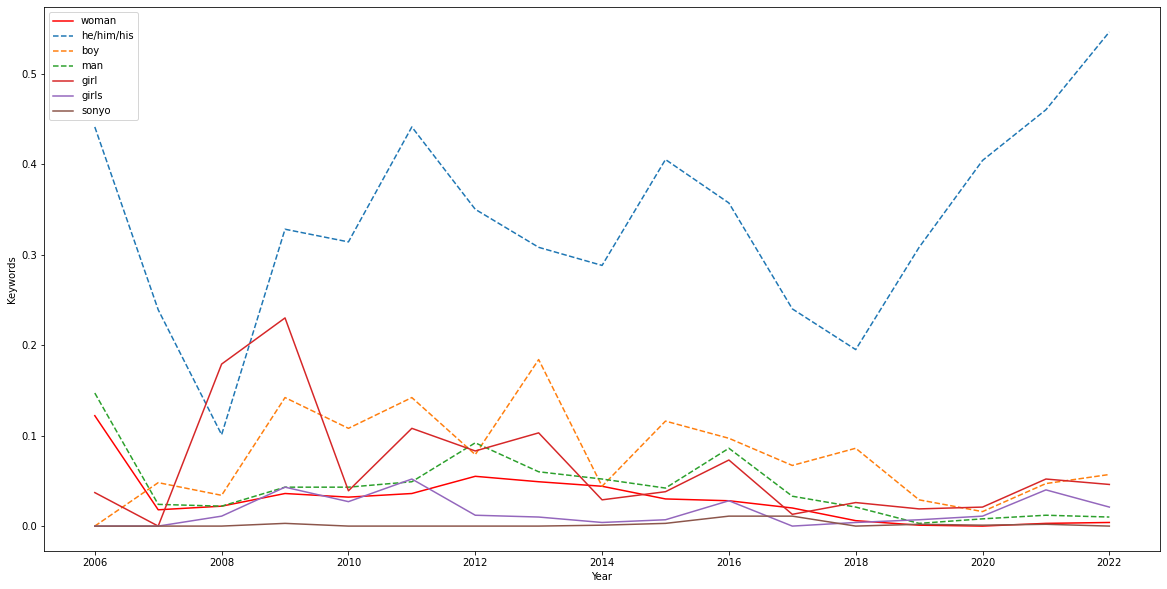

In [120]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from pandas import DataFrame

plt.figure(figsize = (20,10))
# plt.plot(keywords_df['love'], label = 'love', color = 'pink')
# plt.plot(keywords_df['kiss'], label = 'kiss')
# plt.plot(keywords_df['touch'], label = 'touch')
# plt.plot(keywords_df['like'], label = 'like')
plt.plot(keywords_df['woman'], color='red', label = 'woman')

plt.plot(keywords_df['he/him/his'], linestyle='dashed', label = 'he/him/his')
plt.plot(keywords_df['boy'], linestyle='dashed', label = 'boy')
plt.plot(keywords_df['man'], linestyle='dashed', label = 'man')
# plt.plot(keywords_df['want'], label='want')
plt.plot(keywords_df['girl'], label = 'girl')
plt.plot(keywords_df['girls'], label = 'girls')
plt.plot(keywords_df['so-nyo'], label = 'sonyo')

plt.legend(loc='upper left')
plt.xlabel("Year")
plt.ylabel("Keywords")
plt.show()